SCIKIT-LEARN

Implementando un modelo simple de regresión

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X = pd.read_csv('X.csv')

In [4]:
X.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,2.500000e+08,8.5,4.481306e+08


In [5]:
y = X['worldwide_gross'] #Definimos el target

In [7]:
X = X.drop('worldwide_gross',axis=1) #Eliminamos el target del dataframe

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4) #Dividimos el dataframe en datos de entrenamiento y de pruebas (60% y 40% respectivamentes)

In [9]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [10]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration.1,budget,imdb_score,gross
0,425000000.0,2009.0,1.78,178.0,237000000.0,7.9,760505847.0


In [11]:
from sklearn.linear_model import Lasso #Importa el modelo Lasso

model = Lasso() #Instancia modelo

In [12]:
model.fit(X_train,y_train) #Entrena el modelo

Lasso()

In [13]:
predicted = model.predict(X_test) #Predecimos los valores del modelo con los datos de pruebas

In [15]:
predicted.shape

(1642,)

(array([[1.394e+03, 1.910e+02, 3.800e+01, 1.400e+01, 3.000e+00, 1.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.425e+03, 1.520e+02, 3.800e+01, 1.700e+01, 6.000e+00, 2.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]]),
 array([-9.83970788e+07,  1.89834527e+08,  4.78066133e+08,  7.66297739e+08,
         1.05452935e+09,  1.34276095e+09,  1.63099256e+09,  1.91922416e+09,
         2.20745577e+09,  2.49568738e+09,  2.78391898e+09]),
 <a list of 2 BarContainer objects>)

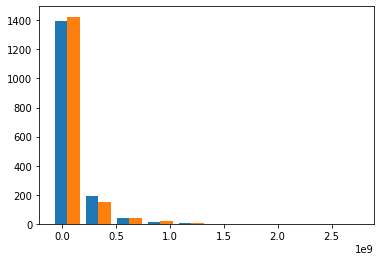

In [18]:
%matplotlib inline

plt.hist([predicted,y_test])

Evaluando el modelo

In [19]:
model.score(X_test,y_test)

0.8595166204082839

In [20]:
residuals = y_test-predicted

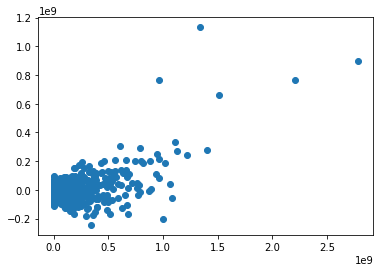

In [21]:
plt.scatter(y_test,residuals)

In [22]:
ap_residuals = np.abs(residuals) / y_test

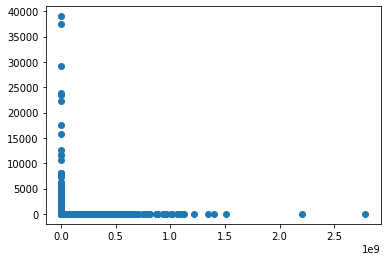

In [24]:
plt.scatter(y_test, ap_residuals)

In [25]:
lap_residuals = np.log(ap_residuals)

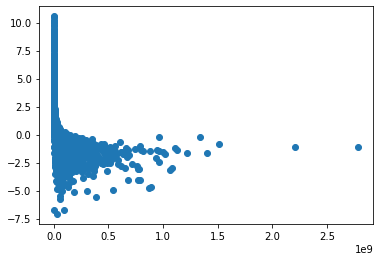

In [26]:
plt.scatter(y_test, lap_residuals)

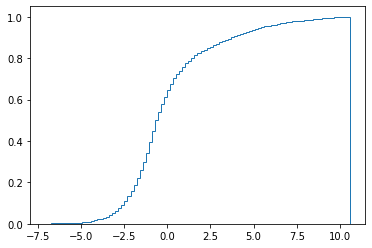

In [30]:
plt.hist(lap_residuals,bins=100, density=True, histtype='step', cumulative=True);

(-2.0, 0.0, 0.0, 1.0)

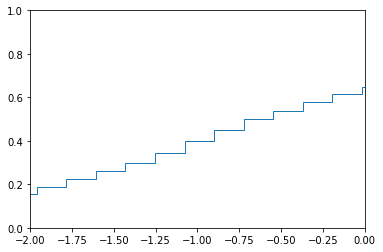

In [31]:
plt.hist(lap_residuals,bins=100, density=True, histtype='step', cumulative=True);
plt.axis([-2,0,0,1])